In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
path = '/content/drive/MyDrive/머신러닝/data/pima-indians-diabetes3.csv'

In [3]:
raw = pd.read_csv(path)
df = raw.copy()
df.head()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#파이썬 슬라이싱으로 데이터 프레임에 diabetes 열과, 아닌 열 구분
x = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [5]:
sc = StandardScaler()
sc.fit_transform(x)

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [6]:
pd.DataFrame(sc.transform(x), columns=x.columns)

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


In [7]:
scaled_x = pd.DataFrame(sc.transform(x), columns=x.columns)

# 스케일링 전 후의 차이 살펴보기

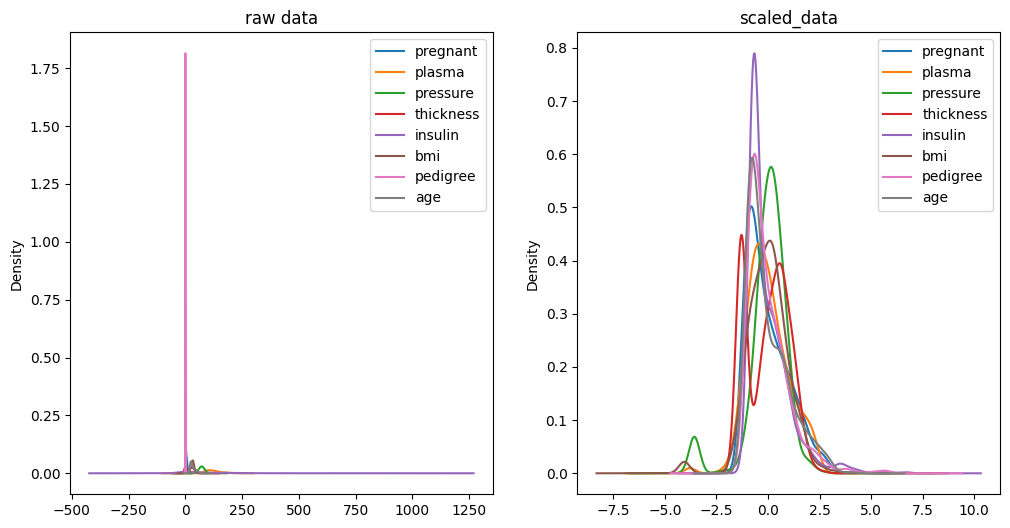

In [8]:
fig, ax = plt.subplots(1,2, figsize = ( 12, 6 ))

x.plot(kind='kde', title='raw data', ax=ax[0])
scaled_x.plot(kind='kde', title='scaled_data', ax=ax[1])

plt.show()

In [9]:
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2, random_state=42)

# 모델링

In [10]:
#1.의사결정나무 모델
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [11]:
y_pred = dt.predict(x_test)

In [13]:
# (계층적)K-폴드 교차 검증 = x와 y비율이 전체 데이터셋의 비율과 같게 하여서 K-fold교차검증 수행
skf = StratifiedKFold(n_splits=10, shuffle=True)

#교차검증
cross_val_score(dt, x_train, y_train, cv=skf)

acc = cross_val_score(dt, x_train, y_train, cv=skf)

In [14]:
print('acc: {:.2f}%'.format(acc.mean()*100))
print('std: {:.2f}%'.format(acc.std()*100) )

acc: 69.40%
std: 4.09%


# 모델링 2 - 랜덤포레스트

In [15]:
from sklearn.ensemble import RandomForestClassifier

#몇 그의 의사결정나무를 활용할 것인가
rf = RandomForestClassifier(n_estimators=50)
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

In [16]:
y_pred = rf.predict(x_test)

In [17]:
# (계층적)K-폴드 교차 검증 = x와 y비율이 전체 데이터셋의 비율과 같게 하여서 K-fold교차검증 수행
skf = StratifiedKFold(n_splits=10, shuffle=True)

#교차검증
cross_val_score(rf, x_train, y_train, cv=skf)

acc = cross_val_score(rf, x_train, y_train, cv=skf)

print('acc: {:.2f}%'.format(acc.mean()*100))
print('std: {:.2f}%'.format(acc.std()*100))

acc: 75.40%
std: 4.31%


# 모델링 3- KNN 모델링

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [19]:
y_pred = knn.predict(x_test)

# (계층적)K-폴드 교차 검증 = x와 y비율이 전체 데이터셋의 비율과 같게 하여서 K-fold교차검증 수행
skf = StratifiedKFold(n_splits=10, shuffle=True)

#교차검증
cross_val_score(knn, x_train, y_train, cv=skf)

acc = cross_val_score(knn, x_train, y_train, cv=skf)

print('acc: {:.2f}%'.format(acc.mean()*100))
print('std: {:.2f}%'.format(acc.std()*100))

acc: 70.71%
std: 5.56%


# 모델링 4 - Adaboost

In [20]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier()
adaboost.fit(x_train, y_train)

AdaBoostClassifier()

In [21]:
y_pred = adaboost.predict(x_test)

# (계층적)K-폴드 교차 검증 = x와 y비율이 전체 데이터셋의 비율과 같게 하여서 K-fold교차검증 수행
skf = StratifiedKFold(n_splits=10, shuffle=True)

#교차검증
cross_val_score(adaboost, x_train, y_train, cv=skf)

acc = cross_val_score(adaboost, x_train, y_train, cv=skf)

print('acc: {:.2f}%'.format(acc.mean()*100))
print('std: {:.2f}%'.format(acc.std()*100))

acc: 74.12%
std: 6.52%


# 모델링 - 보팅 클래시파이어

In [22]:
#서포트 벡터 머신
from sklearn.svm import SVC

#보팅 : 여러개의 분류기가 투표를 통해 다수결로 결론을 냄
#소프트 보팅 : 모델이 예측한 확률 점수까지 고려해서 다수결
#하드 보팅 : 단순한 다수결
from sklearn.ensemble import VotingClassifier

clf1 = AdaBoostClassifier()
clf2 = RandomForestClassifier()
clf3 = SVC(kernel='linear')

vc = VotingClassifier([('adaboost', clf1), ('rf', clf2), ('svc', clf3)], voting='hard')
vc.fit(x_train, y_train)

VotingClassifier(estimators=[('adaboost', AdaBoostClassifier()),
                             ('rf', RandomForestClassifier()),
                             ('svc', SVC(kernel='linear'))])

In [24]:
y_pred = vc.predict(x_test)

# (계층적)K-폴드 교차 검증 = x와 y비율이 전체 데이터셋의 비율과 같게 하여서 K-fold교차검증 수행
skf = StratifiedKFold(n_splits=10, shuffle=True)

#교차검증
cross_val_score(vc, x_train, y_train, cv=skf)

acc = cross_val_score(vc, x_train, y_train, cv=skf)

print('acc: {:.2f}%'.format(acc.mean()*100))
print('std: {:.2f}%'.format(acc.std()*100))

acc: 76.72%
std: 4.17%


## 모델링 - 배깅 분류기

In [25]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(base_estimator=SVC(kernel='rbf'), n_estimators=10)
bagging.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=SVC())

In [26]:
y_pred = bagging.predict(x_test)

# (계층적)K-폴드 교차 검증 = x와 y비율이 전체 데이터셋의 비율과 같게 하여서 K-fold교차검증 수행
skf = StratifiedKFold(n_splits=10, shuffle=True)

#교차검증
cross_val_score(bagging, x_train, y_train, cv=skf)

acc = cross_val_score(bagging, x_train, y_train, cv=skf)

print('acc: {:.2f}%'.format(acc.mean()*100))
print('std: {:.2f}%'.format(acc.std()*100))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

acc: 75.88%
std: 6.67%


### 모델링 = 합산(모든 모델을 한번에)

In [27]:
classifiers = [DecisionTreeClassifier(),
               RandomForestClassifier(),
               KNeighborsClassifier(),
               SVC(kernel='linear'),
               SVC(kernel='rbf'),
               AdaBoostClassifier(),
               VotingClassifier(estimators= [
                  ('1', AdaBoostClassifier()),
                  ('2', RandomForestClassifier()),
                  ('3', SVC(kernel='linear'))]),
               BaggingClassifier(estimator=clf3, n_estimators=10, random_state=42)]

In [28]:
classifier_names = ['dt', 'rf', 'knn', 'svm_linear', 'svc_rbf',
                    'adaboost','voting', 'bagging']

In [29]:
# 결과가 저장될 리스트
model_accuracy = []
model_means = []
model_names = []

# 각 분류기 실행 >> 결과 저장
classifier_data = zip(classifier_names, classifiers)

for classifier_name, classifier in classifier_data:
  # 계층별 교차검증
  skf = StratifiedKFold(n_splits=10, shuffle=True)
  # 교차 검증 >> 정확도 계산
  accuracy = cross_val_score(classifier, X = x_train, y = y_train, cv = skf)
  # 정확도 평균값 출력
  print('mean_acc:' , classifier_name, '{:.2f}%'.format(accuracy.mean()*100))

  # 결과 저장
  model_accuracy.append(accuracy)
  model_means.append(accuracy.mean()*100)
  model_names.append(classifier_name)

mean_acc: dt 70.85%
mean_acc: rf 77.19%
mean_acc: knn 71.66%
mean_acc: svm_linear 76.41%
mean_acc: svc_rbf 75.88%
mean_acc: adaboost 75.24%
mean_acc: voting 76.69%
mean_acc: bagging 77.50%


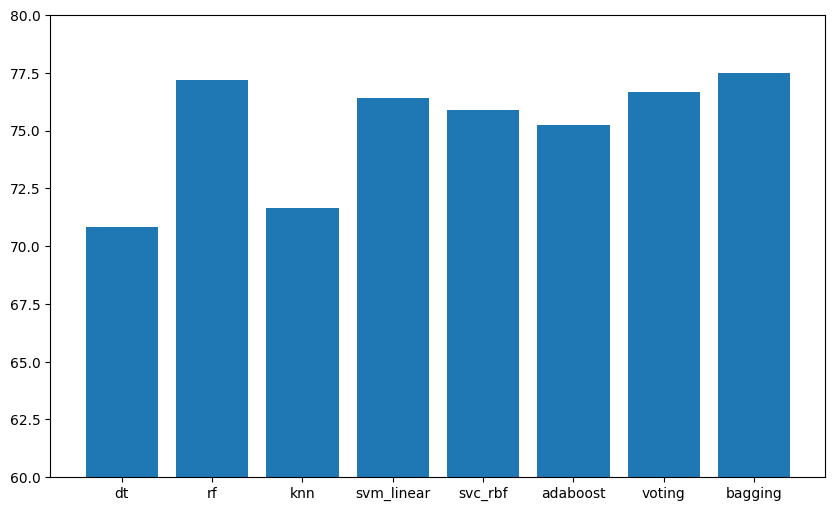

In [30]:
# 각 분류기 별 정확도 평균값을 막대그래프로 출력
plt.figure(figsize=(10,6))
plt.ylim([60,80])
plt.bar(model_names, model_means)
plt.show()